In [2]:
#libraries to include 
library(plyr)
library(dplyr)
library(shiny)
library(ggplot2)
library(DT)

#read in data
prod <- read.csv("annual_generation_state.csv",header = TRUE, sep = ",")
prod1 <- filter(prod,TYPE.OF.PRODUCER == "Total Electric Power Industry")


#remove states with no names 
prod1 <- prod1[-c(5829,5830,5831),]

#make column name GENERATION.Megawatthours. into numeric values
prod1$GENERATION..Megawatthours. <- as.numeric(gsub(",", "",prod1$GENERATION..Megawatthours.))

#make all the strings in column STATE to uppercase
prod1$STATE <- toupper(prod1$STATE)

#remove rows that have ENERGY.SOURCE as "Other", "Other Gases" , "Other Biomass", and "Pumped Storage"
prod2 <- subset(prod1, ENERGY.SOURCE!="Other" & ENERGY.SOURCE!="Other Gases" & ENERGY.SOURCE!="Other Biomass" & ENERGY.SOURCE!= "Pumped Storage")

#remove negative values in GENERATION..Megawatthours
prod2 <- subset(prod2, prod2$GENERATION..Megawatthours. >= 0)

droplevels(prod2)

#make these columns into categorical values 
prod2$'ENERGY.SOURCE' <- as.factor(prod2$ENERGY.SOURCE)
prod2$'TYPE.OF.PRODUCER' <- as.factor(prod2$TYPE.OF.PRODUCER)
prod2$'STATE' <- as.factor(prod2$STATE)

#
levels(prod2$ENERGY.SOURCE)[levels(prod2$ENERGY.SOURCE) == "Hydroelectric Conventional"] <- "Hydro"
levels(prod2$ENERGY.SOURCE)[levels(prod2$ENERGY.SOURCE) == "Wood and Wood Derived Fuels"] <- "Wood"
levels(prod2$ENERGY.SOURCE)[levels(prod2$ENERGY.SOURCE) == "Solar Thermal and Photovoltaic"] <- "Solar"

rownames(prod2) <- 1:nrow(prod2)
source <- factor(c('Coal','Geothermal','Hydro','Natrual Gas','Nuclear','Petroleum','Solar','Wind','Wood'))
#str(prod2)


ERROR: Error in library(DT): there is no package called 'DT'


In [6]:
values = prod2
values = ddply(values, .(YEAR), transform, PERCENT =GENERATION..Megawatthours./sum(GENERATION..Megawatthours.)*100)

In [7]:
total <- values[prod2$ENERGY.SOURCE == "Total",]
total
notTotal <- values[prod2$ENERGY.SOURCE != "Total",]
notTotal

,YEAR,STATE,TYPE.OF.PRODUCER,ENERGY.SOURCE,GENERATION..Megawatthours.,PERCENT
1,1990,AK,Total Electric Power Industry,Total,5599506,0.046262353
8,1990,AL,Total Electric Power Industry,Total,79652133,0.658075037
15,1990,AR,Total Electric Power Industry,Total,39099598,0.323035535
22,1990,AZ,Total Electric Power Industry,Total,62774297,0.518632663
29,1990,CA,Total Electric Power Industry,Total,165784909,1.369692261
39,1990,CO,Total Electric Power Industry,Total,32548127,0.268908177
44,1990,CT,Total Electric Power Industry,Total,35147247,0.290381751
50,1990,DC,Total Electric Power Industry,Total,361043,0.002982888
53,1990,DE,Total Electric Power Industry,Total,7841500,0.064785401
57,1990,FL,Total Electric Power Industry,Total,131502553,1.086456121


,YEAR,STATE,TYPE.OF.PRODUCER,ENERGY.SOURCE,GENERATION..Megawatthours.,PERCENT
2,1990,AK,Total Electric Power Industry,Coal,510573,0.0042182843
3,1990,AK,Total Electric Power Industry,Hydro,974521,0.0080513593
4,1990,AK,Total Electric Power Industry,Natural Gas,3466261,0.0286377747
5,1990,AK,Total Electric Power Industry,Petroleum,497116,0.0041071045
6,1990,AK,Total Electric Power Industry,Wind,0,0.0000000000
7,1990,AK,Total Electric Power Industry,Wood,151035,0.0012478305
9,1990,AL,Total Electric Power Industry,Coal,53658115,0.4433160127
10,1990,AL,Total Electric Power Industry,Hydro,10366507,0.0856466641
11,1990,AL,Total Electric Power Industry,Natural Gas,1020714,0.0084329996
12,1990,AL,Total Electric Power Industry,Nuclear,12051882,0.0995710020


In [8]:
values
filter(values, YEAR == 1990)


YEAR,STATE,TYPE.OF.PRODUCER,ENERGY.SOURCE,GENERATION..Megawatthours.,PERCENT
1990,AK,Total Electric Power Industry,Total,5599506,0.0462623533
1990,AK,Total Electric Power Industry,Coal,510573,0.0042182843
1990,AK,Total Electric Power Industry,Hydro,974521,0.0080513593
1990,AK,Total Electric Power Industry,Natural Gas,3466261,0.0286377747
1990,AK,Total Electric Power Industry,Petroleum,497116,0.0041071045
1990,AK,Total Electric Power Industry,Wind,0,0.0000000000
1990,AK,Total Electric Power Industry,Wood,151035,0.0012478305
1990,AL,Total Electric Power Industry,Total,79652133,0.6580750369
1990,AL,Total Electric Power Industry,Coal,53658115,0.4433160127
1990,AL,Total Electric Power Industry,Hydro,10366507,0.0856466641


YEAR,STATE,TYPE.OF.PRODUCER,ENERGY.SOURCE,GENERATION..Megawatthours.,PERCENT
1990,AK,Total Electric Power Industry,Total,5599506,0.0462623533
1990,AK,Total Electric Power Industry,Coal,510573,0.0042182843
1990,AK,Total Electric Power Industry,Hydro,974521,0.0080513593
1990,AK,Total Electric Power Industry,Natural Gas,3466261,0.0286377747
1990,AK,Total Electric Power Industry,Petroleum,497116,0.0041071045
1990,AK,Total Electric Power Industry,Wind,0,0.0000000000
1990,AK,Total Electric Power Industry,Wood,151035,0.0012478305
1990,AL,Total Electric Power Industry,Total,79652133,0.6580750369
1990,AL,Total Electric Power Industry,Coal,53658115,0.4433160127
1990,AL,Total Electric Power Industry,Hydro,10366507,0.0856466641


In [9]:
options(scipen= 999)
colors <- c("Coal" = "grey45","Geothermal" = "cornflowerblue","Hydro" = "steelblue4","Natural Gas" = "royalblue4","Nuclear" = "plum4","Petroleum" = "indianred3","Solar" = "gold2","Wind" = "lightseagreen","Wood" = "rosybrown4")
stackBar <- ggplot() + geom_bar(aes(y = GENERATION..Megawatthours.,x = YEAR, fill = ENERGY.SOURCE), data = notTotal, stat = "identity")

stackBar <- stackBar + labs(x="Years", y="MegaWatts Used", fill = "Type of Energy Source")+
            ggtitle("Total Amount of each Energy Source used from Years 1990-2019")+
            scale_x_continuous(breaks=seq(1990,2019,4))+ theme_minimal()+
            scale_fill_manual("Type of Energy Source", values =colors )

stackBar <- stackBar + 
            theme(text = element_text(size=10))+
            theme(axis.title.x = element_text(size=13))+
            theme(axis.title.y = element_text(size=13))+
            theme(panel.background = element_rect(fill= "grey85",colour="black",size=0.5))

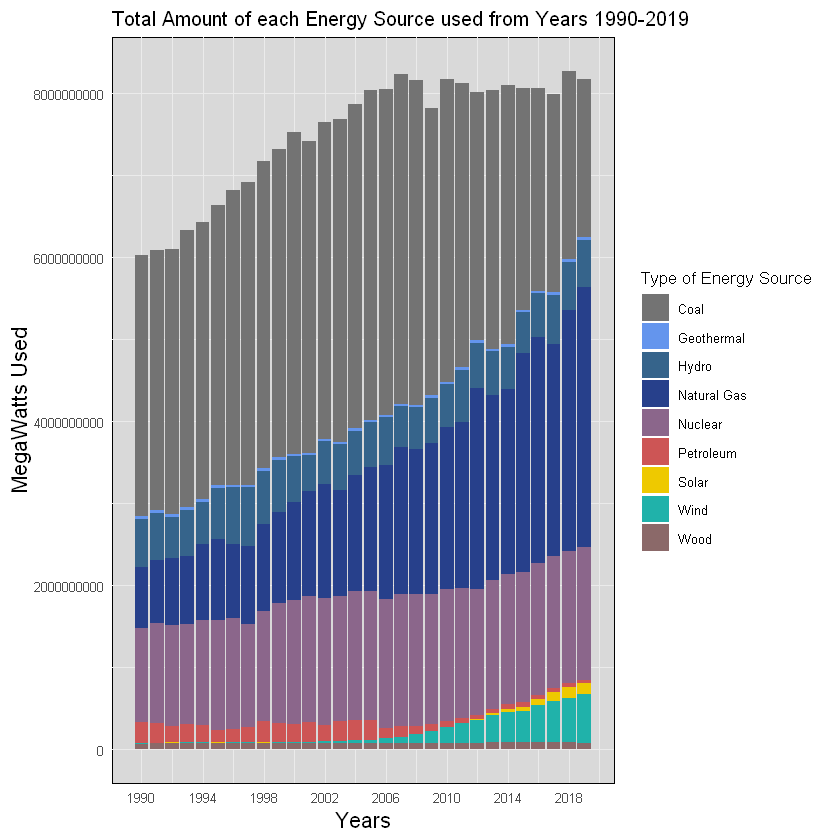

In [10]:
stackBar

In [11]:
library(scales)
stackBar2 <- ggplot() + geom_bar(aes(y = PERCENT,x = YEAR, fill = ENERGY.SOURCE ), data = notTotal, stat = "identity")

stackBar2 <- stackBar2 + labs(x="Years", y="Percent of each Energy Source", fill = "Type of Energy Source")+
             ggtitle("Total Amount of each Energy Source used from Years 1990-2019")+
             scale_x_continuous(breaks=seq(1990,2019,4))+
             scale_fill_manual("Type of Energy Source", values =colors )  



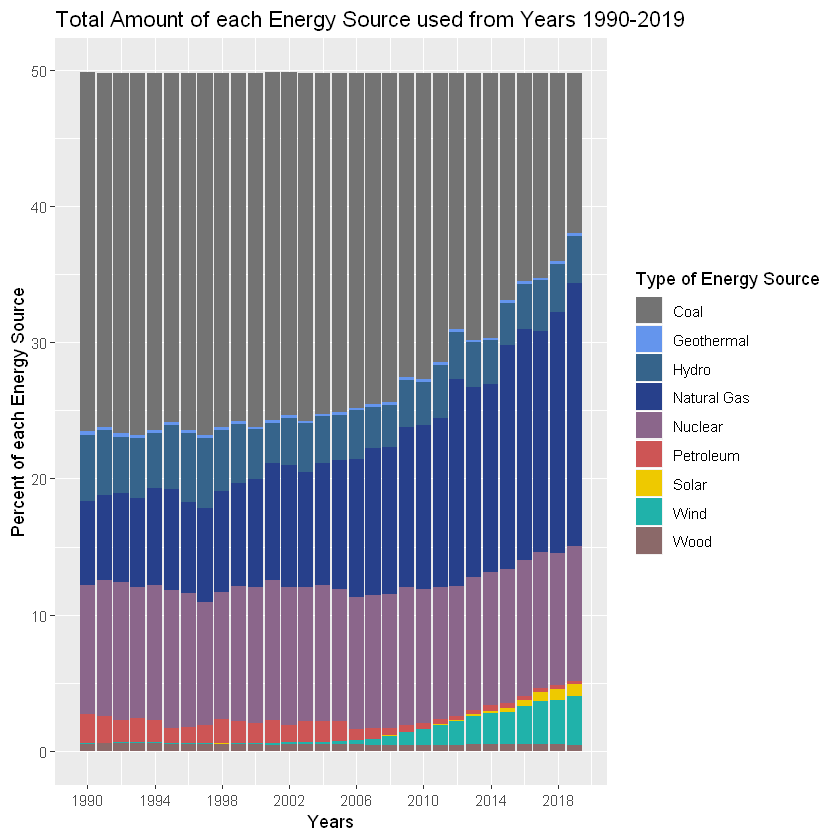

In [12]:
stackBar2

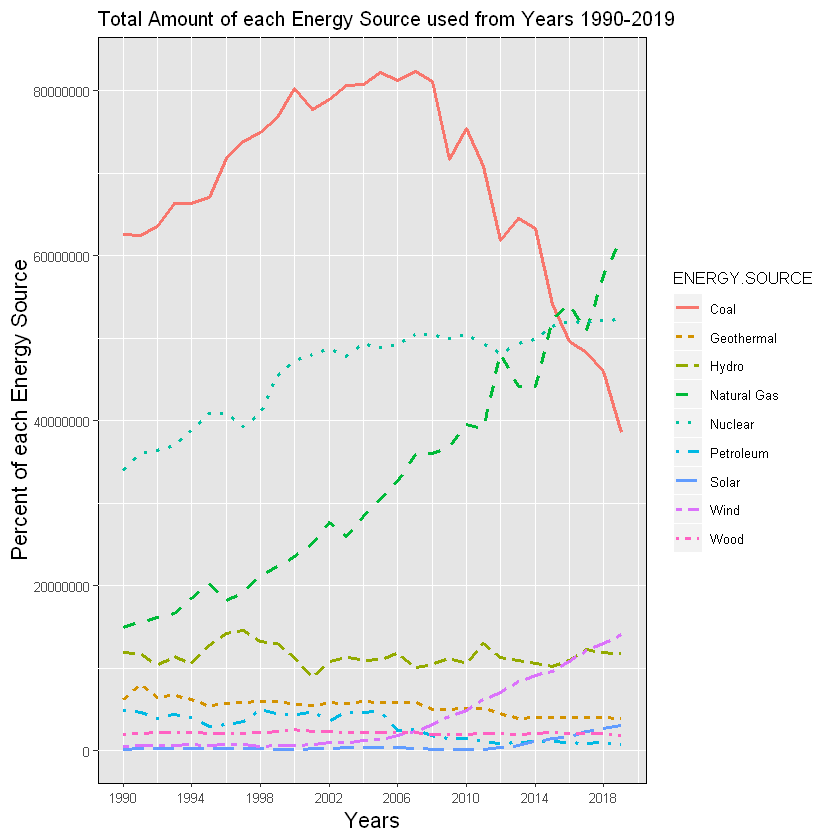

In [13]:
lineChart <- ggplot(notTotal, aes(x=YEAR, y=GENERATION..Megawatthours., color=ENERGY.SOURCE))
lineChart <- lineChart + stat_summary(fun.y="mean", geom="line", size=1.1, 
                        aes(linetype = ENERGY.SOURCE))
lineChart <- lineChart + labs(x="Years", y="Percent of each Energy Source", fill = "Type of Energy Source")+
             ggtitle("Total Amount of each Energy Source used from Years 1990-2019")+
             scale_x_continuous(breaks=seq(1990,2019,4))+
             scale_fill_manual("Type of Energy Source", values =colors ) 

lineChart <- lineChart + 
            theme(text = element_text(size=10))+
            theme(axis.title.x = element_text(size=13))+
            theme(axis.title.y = element_text(size=13))+
            theme(panel.background = element_rect(fill= "grey90",colour="black",size=0.5))
lineChart

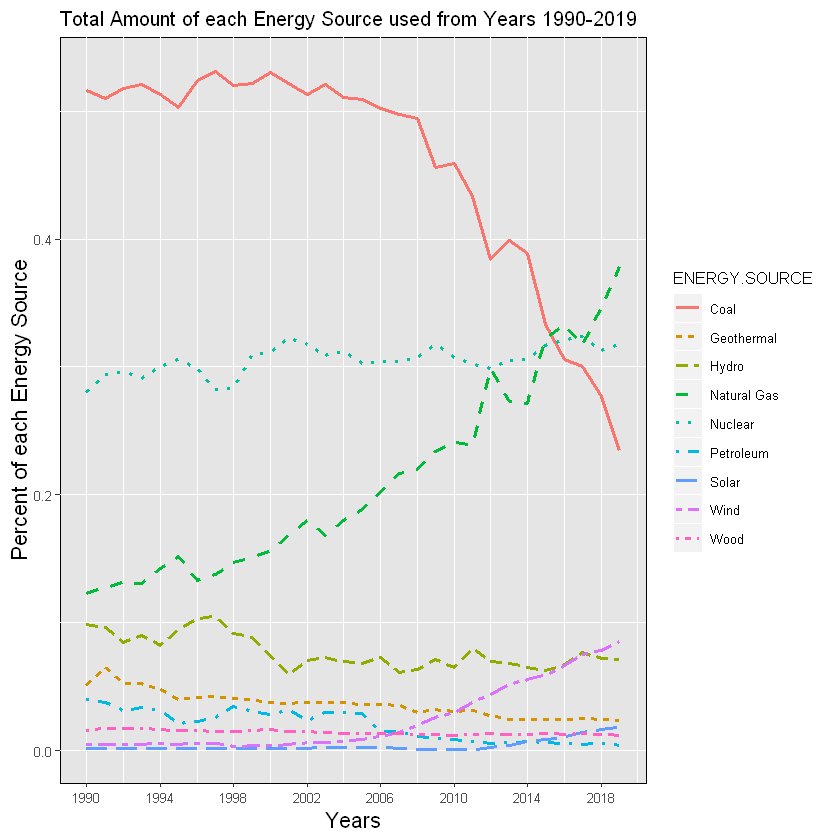

In [14]:
lineChart2 <- ggplot(notTotal, aes(x=YEAR, y=PERCENT, color=ENERGY.SOURCE))
lineChart2 <- lineChart2 + stat_summary(fun.y="mean", geom="line", size=1.1, 
                        aes(linetype = ENERGY.SOURCE))
lineChart2 <- lineChart2 + labs(x="Years", y="Percent of each Energy Source", fill = "Type of Energy Source")+
             ggtitle("Total Amount of each Energy Source used from Years 1990-2019")+
             scale_x_continuous(breaks=seq(1990,2019,4))+
             scale_fill_manual("Type of Energy Source", values =colors ) 

lineChart2 <- lineChart2 + 
            theme(text = element_text(size=10))+
            theme(axis.title.x = element_text(size=13))+
            theme(axis.title.y = element_text(size=13))+
            theme(panel.background = element_rect(fill= "grey90",colour="black",size=0.5))
lineChart2

In [18]:

DT::renderDataTable(
  
   DT::datatable({ 
     
    data <- data.table(prod2[,c("GENERATION..Megawatthours.","PERCENT")])
    }, 
  options = list(searching = FALSE, pageLength = 10, lengthChange = FALSE, order = list(list(1, 'desc'))
  ), rownames = FALSE 
  )
)

ERROR: Error in loadNamespace(name): there is no package called 'DT'
